In [28]:
# Loading importantLibraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import nltk
from nltk.tokenize import *
import string
import re
import os
import spacy as sp

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
text = 'Hope, is the only thing stronger than fear! #Hope #Amal.M'

### Word and Sentence tokenizer:

In [31]:
print(word_tokenize(text))

['Hope', ',', 'is', 'the', 'only', 'thing', 'stronger', 'than', 'fear', '!', '#', 'Hope', '#', 'Amal.M']


In [32]:
print(sent_tokenize(text))

['Hope, is the only thing stronger than fear!', '#Hope #Amal.M']


### Punctuation-Based tokenizer:

In [33]:
print(wordpunct_tokenize(text))

['Hope', ',', 'is', 'the', 'only', 'thing', 'stronger', 'than', 'fear', '!', '#', 'Hope', '#', 'Amal', '.', 'M']


### TreeBank Word Tokenizer:

In [34]:
text = "What you don't want to be done to yourself, don't do to others..."
tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize(text))

['What', 'you', 'do', "n't", 'want', 'to', 'be', 'done', 'to', 'yourself', ',', 'do', "n't", 'do', 'to', 'others', '...']


### Tweet Tokenizer:

In [35]:
tweet = "Don't take cryptocurrency advice from people on Twitter 😊"

In [36]:
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet))

["Don't", 'take', 'cryptocurrency', 'advice', 'from', 'people', 'on', 'Twitter', '😊']


### MWET(Multi-Word Expression Tokenizer):

In [37]:
text = "Hope, is the only thing stronger than fear! Hunger Games #Hope"
tokenizer = MWETokenizer()
print(tokenizer.tokenize(word_tokenize(text)))

['Hope', ',', 'is', 'the', 'only', 'thing', 'stronger', 'than', 'fear', '!', 'Hunger', 'Games', '#', 'Hope']


In [38]:
tokenizer.add_mwe(('Hunger','Games'))
print(tokenizer.tokenize(word_tokenize(text)))

['Hope', ',', 'is', 'the', 'only', 'thing', 'stronger', 'than', 'fear', '!', 'Hunger_Games', '#', 'Hope']


### TextBlob Word Tokenize:

In [39]:
#pip install -U textblob

In [40]:
from textblob import TextBlob

text = "But I'm glad you'll see me as I am. Above all, I wouldn't want people to think that I want to prove anything. I don't want to prove anything . I just want to live to cause no evil to anyone but myself."

In [41]:
blob_object = TextBlob(text)
text_words = blob_object.words

print(text_words)
print(len(text_words))

['But', 'I', "'m", 'glad', 'you', "'ll", 'see', 'me', 'as', 'I', 'am', 'Above', 'all', 'I', 'would', "n't", 'want', 'people', 'to', 'think', 'that', 'I', 'want', 'to', 'prove', 'anything', 'I', 'do', "n't", 'want', 'to', 'prove', 'anything', 'I', 'just', 'want', 'to', 'live', 'to', 'cause', 'no', 'evil', 'to', 'anyone', 'but', 'myself']
46


### Gensim Word Tokenizer:

In [42]:
from gensim.utils import tokenize
list(tokenize(text))

['But',
 'I',
 'm',
 'glad',
 'you',
 'll',
 'see',
 'me',
 'as',
 'I',
 'am',
 'Above',
 'all',
 'I',
 'wouldn',
 't',
 'want',
 'people',
 'to',
 'think',
 'that',
 'I',
 'want',
 'to',
 'prove',
 'anything',
 'I',
 'don',
 't',
 'want',
 'to',
 'prove',
 'anything',
 'I',
 'just',
 'want',
 'to',
 'live',
 'to',
 'cause',
 'no',
 'evil',
 'to',
 'anyone',
 'but',
 'myself']

### Tokenization with Keras:

In [43]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence

In [44]:
ntoken = Tokenizer(num_words = 20)

In [45]:
ntoken.fit_on_texts(text)
list_words = text_to_word_sequence(text)
print(list_words)

['but', "i'm", 'glad', "you'll", 'see', 'me', 'as', 'i', 'am', 'above', 'all', 'i', "wouldn't", 'want', 'people', 'to', 'think', 'that', 'i', 'want', 'to', 'prove', 'anything', 'i', "don't", 'want', 'to', 'prove', 'anything', 'i', 'just', 'want', 'to', 'live', 'to', 'cause', 'no', 'evil', 'to', 'anyone', 'but', 'myself']


## Lemmatization:

### Wordnet Lemmatizer:

## 5th August, 2022 - NLP Lab Practice:

In [47]:
df = pd.read_csv("spam.csv",encoding='iso-8859-1')

In [48]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [50]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

#### Changing the name of the columns:

In [51]:
df['Label'] = df['v1']
df['sms-Content'] = df['v2']

In [52]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Label,sms-Content
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
df.isna().sum()

v1                0
v2                0
Unnamed: 2     5522
Unnamed: 3     5560
Unnamed: 4     5566
Label             0
sms-Content       0
dtype: int64

In [54]:
# Dropping the renamed columns from the orginal dataset:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','v1','v2'],axis = 1, inplace = True)

In [55]:
df

,Label,sms-Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [56]:
spam_df = df.copy()

In [57]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Label        5572 non-null   object
 1   sms-Content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [58]:
spam_df['sms-Content']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms-Content, Length: 5572, dtype: object

In [59]:
spam_df.shape

(5572, 2)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


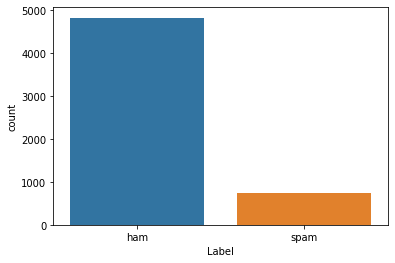

In [60]:
sns.countplot(spam_df['Label'], label = "Count of Categories")
plt.show()

In [61]:
spam_df['Length'] = spam_df['sms-Content'].apply(len)

In [62]:
spam_df

,Label,sms-Content,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<AxesSubplot:ylabel='Frequency'>

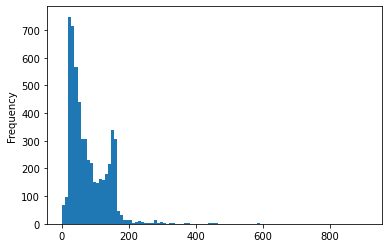

In [63]:
spam_df['Length'].plot(bins=100, kind='hist')

In [64]:
spam_df[spam_df['Length'] == 11]['sms-Content'].iloc[0]

'Lmao!nice 1'

In [65]:
spam_df[spam_df['Length'] == 84]['sms-Content'].iloc[0]

'For fear of fainting with the of all that housework you just did? Quick have a cuppa'

In [66]:
ham = spam_df[spam_df['Label'] == 'ham']
ham

,Label,sms-Content,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77
...,...,...,...
5565,ham,Huh y lei...,12
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [67]:
spam = spam_df[spam_df['Label'] == 'spam']
spam

,Label,sms-Content,Length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147


In [68]:
sentences = spam_df['sms-Content'].tolist()

In [69]:
sentences

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

In [70]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer

from nltk.corpus import stopwords # Also, for the data preprocessing
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
ls = LancasterStemmer()
wordNet = WordNetLemmatizer()

In [72]:
corpusStemmed = []
for i in range(len(sentences)):
  record = re.sub("[^a-zA-Z]"," ",sentences[i])
  record = record.lower()
  record = record.split()
  record = [ls.stem(word) for word in record if not word in stopwords.words('english')]
  record = ' '.join(record)
  corpusStemmed.append(record)

In [73]:
corpusStemmed

['go jurong point crazy avail bug n gre world la e buffet cin got am wat',
 'ok lar jok wif u on',
 'fre entry wkly comp win fa cup fin tkts st may text fa receiv entry quest std txt rat c apply',
 'u dun say ear hor u c already say',
 'nah think goe usf liv around though',
 'freemsg hey darl week word back lik fun stil tb ok xxx std chgs send rcv',
 'ev broth lik speak tre lik aid pat',
 'per request mel mel oru minnaminungint nurungu vettam set callertun cal press cop friend callertun',
 'win valu network custom select receive priz reward claim cal claim cod kl valid hour',
 'mobl month u r entitl upd latest colo mobl camer fre cal mobl upd co fre',
 'gonn hom soon want talk stuff anym tonight k cri enough today',
 'six chant win cash pound txt csh send cost p day day tsandc apply reply hl info',
 'urg week fre memb priz jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breath prom wont tak help grant fulfil prom wond bless tim',
 'dat sunday',
 '

In [75]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [76]:
corpusLemmatized = []
for i in range(len(sentences)):
  record = re.sub("[^a-zA-Z]"," ",sentences[i])
  record = record.lower()
  record = record.split()
  record =[wordNet.lemmatize(word) for word in record if not word in stopwords.words('english')]
  record = ' '.join(record)
  corpusLemmatized.append(record)

In [77]:
corpusLemmatized

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

### Tokenization:
Use the following tokenization

1) White space tokenization

2) Sentence tokenization

3) Word tokenization

#### White Space Tokenization:

In [78]:
tokenizationData = df.copy()

In [79]:
tokenizationData

,Label,sms-Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [84]:
from nltk.tokenize import WhitespaceTokenizer
wst = WhitespaceTokenizer()
sentenceWhiteSpaceTokenized = []

for i in range(len(sentences)):
    sentenceTokenized = wst.tokenize(sentences[i])
    sentenceWhiteSpaceTokenized.append(sentenceTokenized)
sentenceWhiteSpaceTokenized

[['Go',
  'until',
  'jurong',
  'point,',
  'crazy..',
  'Available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet...',
  'Cine',
  'there',
  'got',
  'amore',
  'wat...'],
 ['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...'],
 ['Free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005.',
  'Text',
  'FA',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question(std',
  'txt',
  "rate)T&C's",
  'apply',
  "08452810075over18's"],
 ['U',
  'dun',
  'say',
  'so',
  'early',
  'hor...',
  'U',
  'c',
  'already',
  'then',
  'say...'],
 ['Nah',
  'I',
  "don't",
  'think',
  'he',
  'goes',
  'to',
  'usf,',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['FreeMsg',
  'Hey',
  'there',
  'darling',
  "it's",
  'been',
  '3',
  "week's",
  'now',
  'and',
  'no',
  'word',
  'back!',
  "I'd",
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
 

#### Sentence Toknizer:

In [85]:
from nltk.tokenize import sent_tokenize

In [89]:
sentenceSentenceTokenized = []

for i in range(len(sentences)):
    sentenceTokenized = sent_tokenize(sentences[i])
    sentenceSentenceTokenized.append(sentenceTokenized)
sentenceSentenceTokenized

[['Go until jurong point, crazy..',
  'Available only in bugis n great world la e buffet... Cine there got amore wat...'],
 ['Ok lar...', 'Joking wif u oni...'],
 ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.',
  "Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
 ['U dun say so early hor... U c already then say...'],
 ["Nah I don't think he goes to usf, he lives around here though"],
 ["FreeMsg Hey there darling it's been 3 week's now and no word back!",
  "I'd like some fun you up for it still?",
  'Tb ok!',
  'XxX std chgs to send, å£1.50 to rcv'],
 ['Even my brother is not like to speak with me.',
  'They treat me like aids patent.'],
 ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers.",
  'Press *9 to copy your friends Callertune'],
 ['WINNER!!',
  'As a valued network customer you have been selected to receivea å£900 prize reward!',
  'To claim c

#### Word Tokenization:

In [90]:
from nltk.tokenize import word_tokenize

In [91]:
setenceWordTokenized = []

for i in range(len(sentences)):
    sentenceTokenized = word_tokenize(sentences[i])
    setenceWordTokenized.append(sentenceTokenized)
setenceWordTokenized

[['Go',
  'until',
  'jurong',
  'point',
  ',',
  'crazy',
  '..',
  'Available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  '...',
  'Cine',
  'there',
  'got',
  'amore',
  'wat',
  '...'],
 ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...'],
 ['Free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  '.',
  'Text',
  'FA',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question',
  '(',
  'std',
  'txt',
  'rate',
  ')',
  'T',
  '&',
  'C',
  "'s",
  'apply',
  '08452810075over18',
  "'s"],
 ['U',
  'dun',
  'say',
  'so',
  'early',
  'hor',
  '...',
  'U',
  'c',
  'already',
  'then',
  'say',
  '...'],
 ['Nah',
  'I',
  'do',
  "n't",
  'think',
  'he',
  'goes',
  'to',
  'usf',
  ',',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['FreeMsg',
  'Hey',
  'there',
  'darling',
  'it',
  "'s",
  'been',
  '3',
  'week',
  "'s"

### Vectorization:
Vectorization –

1) Count vectorization

2) TF-IDF vectorization

3) Hashing Vectorization

4) Word2Vec

#### Count Vectorization:

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
countvectorizer = CountVectorizer()

countvectorizer.fit(sentences)

print("Vocabulary: ", countvectorizer.vocabulary_)

encodeVector = countvectorizer.transform(sentences)

print("Encode Document is: \n",encodeVector.toarray())

Vocabulary:  {'go': 3550, 'until': 8030, 'jurong': 4350, 'point': 5920, 'crazy': 2327, 'available': 1303, 'only': 5537, 'in': 4087, 'bugis': 1751, 'great': 3634, 'world': 8489, 'la': 4476, 'buffet': 1749, 'cine': 2048, 'there': 7645, 'got': 3594, 'amore': 1069, 'wat': 8267, 'ok': 5504, 'lar': 4512, 'joking': 4318, 'wif': 8392, 'oni': 5533, 'free': 3358, 'entry': 2949, 'wkly': 8447, 'comp': 2165, 'to': 7756, 'win': 8405, 'fa': 3087, 'cup': 2386, 'final': 3207, 'tkts': 7743, '21st': 411, 'may': 4930, '2005': 402, 'text': 7595, '87121': 784, 'receive': 6297, 'question': 6190, 'std': 7230, 'txt': 7933, 'rate': 6242, 'apply': 1156, '08452810075over18': 77, 'dun': 2802, 'say': 6633, 'so': 7024, 'early': 2823, 'hor': 3927, 'already': 1042, 'then': 7640, 'nah': 5238, 'don': 2712, 'think': 7660, 'he': 3781, 'goes': 3558, 'usf': 8075, 'lives': 4665, 'around': 1207, 'here': 3831, 'though': 7680, 'freemsg': 3365, 'hey': 3841, 'darling': 2443, 'it': 4218, 'been': 1460, 'week': 8313, 'now': 5420, 'a